In [6]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.7 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/nasar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nasar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df=pd.read_csv('./Dataset.csv')
# Convert sentiment labels to numeric
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [18]:
 #et pandas to display full text for better inspection
pd.set_option('display.max_colwidth', None)

# Load the dataset from the CSV file
try:
    df = pd.read_csv('Dataset.csv')
except FileNotFoundError:
    print("Error: 'dataset.csv' not found. Make sure it's in the same folder as this notebook.")

# Display the first 5 rows and some info
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [38]:

 # Preprocess reviews
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(preprocess)

# Feature extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_review'])

# Target variable
y = df['sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.1165
R2 Score: 0.5339716468349935


In [4]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [19]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [20]:
df = df.sample(500).copy()
df['clean_review'] = df['review'].apply(preprocess_text)

print("Processing..")

print("Comapring original vs cleaned reviews:")
display(df[['review', 'clean_review']].head(10))

Processing..
Comapring original vs cleaned reviews:


,review,clean_review
24195,"As a child I always hated being forced to sit through musicals. I never understood why people would break out into song like that, and I was far too young to appreciate the artistry (choreography, set design, costumes, pacing) behind it all. Carol Reed's ""Oliver!"" was the one musical I remember oddly enjoying as a child, probably because it is one of the darker ones and is appropriately drenched in the spirit of Dickensian squalor. This is a musical about ghetto life in Victorian London, and while the scenery and set designs are stark, dark, and true to that way of life, it is flat out bizarre for people to be breaking out into such ridiculous songs amidst their misery. Upon a recent viewing, my first since childhood, I have some new thoughts and insights into why this musical ""works"" in that bizarre breaking out into song kind of way, and why most just don't do it for me.<br /><br />When musicals work or really say something, it is because they realize their own inherent strangeness. Lars von Trier's ""Dancer in the Dark"" as tragic and operatic and over reaching as it was, worked as a musical because the musical numbers were the products of the imagination of the protagonist, an immigrant obsessed with Hollywood musicals. Likewise, the very cynical and enjoyable ""Chicago"" worked on a similar level because the musical numbers were the products of a homicidal ingenue singer/dancer. Musicals don't work when they take their own musical-nature too seriously (like in ""Moulin Rouge"") or are simply too much fluff about nothing (i.e. something pointless like ""Mary Poppins""). Upon viewing ""Oliver!"" for the first time as an adult, I saw it in a new light. Told mostly from the point of view young Oliver, I saw the musical numbers as the products of his childhood imagination and his way of coping with the horrors of ghetto life around him. The best musical number was probably when Nancy got everyone in the tavern signing and dancing about the joys of getting drunk (as a cover to help poor Oliver escape the clutches of the evil Bill Sykes). It was undeniably catchy and sounded like a real pub tune that drunks might start singing around a piano. There are other great and classic tunes to be heard here, and the direction and acting from the leads to the dancing extras are all top notch.<br /><br />Still, for all its bleakness (although it does have a happy ending for Oliver at least, though certainly things didn't end happily for Nancy, and unless you think a life on the streets being a pick-pocket is fun, it wasn't a necessarily a good ending for Fagin or the Dodger, despite their peppy closing tune) I wouldn't really classify this as a family film, though I don't think showing it to kids over the age of seven or eight will do any harm. This is a harsh tale about an unfortunate orphan trying to survive on the streets and find some happiness. I think it would be very interesting to see a modern update on this some how, perhaps a revisionist take on it, where people on the streets of Compton break into happy songs about their horrible lives. I'd like to see a hard-edged hip-hop version of ""Oliver!"". I always thought Dickens would translate well in those regards. As it stands, ""Oliver!"" was probably the last of the great film musicals and maybe the strangest G-rated film I've ever seen.",child always hate forced sit musical never understand people would break song like far young appreciate artistry choreography set design costume pace behind carol reed oliver one musical remember oddly enjoy child probably one dark one appropriately drench spirit dickensian squalor musical ghetto life victorian london scenery set design stark dark true way life flat bizarre people break ridiculous song amidst misery upon recent viewing first since childhood new thought insight musical work bizarre break song kind way do not mewhen musical work really say something realize inherent strangeness lar von trier dancer da

In [23]:
# Feature extraction using TfidfVectorizer and model training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_review'])

# Ensure sentiment labels are numeric
if df['sentiment'].dtype == 'O':
    df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

y = df['sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.18
R2 Score: 0.27739863508631046


Accuracy: 0.8200


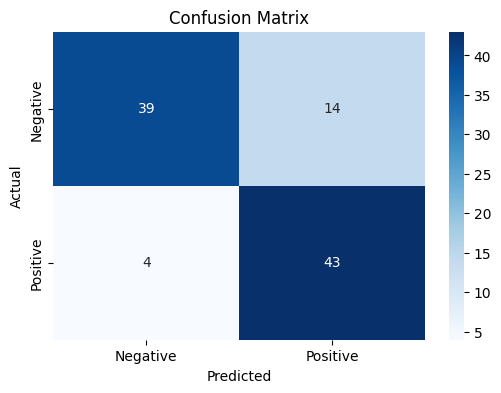

In [24]:
# Model accuracy and confusion matrix plot
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Predict sentiment for sample reviews
sample_reviews = [
    "This product is amazing! I loved it and will buy again.",
    "Terrible experience. The quality was bad and I am disappointed."
]

# Preprocess sample reviews
sample_clean = [preprocess_text(review) for review in sample_reviews]

# Transform using the trained vectorizer
sample_features = vectorizer.transform(sample_clean)

# Predict sentiment
sample_pred = model.predict(sample_features)

for review, pred in zip(sample_reviews, sample_pred):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: This product is amazing! I loved it and will buy again.
Predicted Sentiment: Positive

Review: Terrible experience. The quality was bad and I am disappointed.
Predicted Sentiment: Negative



In [27]:
# Show predictions for a few test movie reviews
import numpy as np

# Get the indices of the test set
_, test_indices = train_test_split(np.arange(len(df)), test_size=0.2, random_state=42)

# Display a few test reviews with their true and predicted sentiment
for idx, true_label, pred_label in zip(test_indices[:10], y_test[:10], y_pred[:10]):
    review = df.iloc[idx]['review']
    sentiment_true = "Positive" if true_label == 1 else "Negative"
    sentiment_pred = "Positive" if pred_label == 1 else "Negative"
    print(f"Review: {review}\nTrue Sentiment: {sentiment_true}\nPredicted Sentiment: {sentiment_pred}\n")

Review: I can't honestly believe that this is a sequel or follow up of John Landis classic comedy horror movie from 1981 . I suppose you can't really describe it as an original werewolf movie either since the bare bones of the story steal elements from the one set in London: An American tourist visits a famous European capital , he narrowly survives a werewolf attack that kills a colleague , he embarks ( Pardon the pun ) on a sexual relationship with someone in the medical profession , he turns into a werewolf , he's visited by apparitions of his dead victims , etc etc . and reading the previous line I've just discovered how much the storyline has in common with the original that it seems very similar indeed . The difference lies in how enjoyable and entertaining the Landis movie is <br /><br />With this Paris based movie there's no scenes that really stand out . There's no naked man waking up in a zoo wondering how he's going to get back home with no money or clothes , there's no biza